In [381]:
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import io

from src.utils.figure import plot_lines
from src.utils.file import get_data_file_path
from src.utils.file import get_evaluation_file_path
from src.utils.metrics import metrics

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Presentation

In [382]:
presentation_row = 150
path = get_data_file_path(event_n=3, formula_n=3, count=2000)
data = pd.read_csv(path)

In [383]:
data.head()

,context,query,question,code,formula,answer,graph
0,"Initially, event3 happened. After event1, even...",C1: Event1 happens or event2 happens.\nC2: C1 ...,"=== Context ===\n\nInitially, event3 happened....","MODULE main\nVAR\n state : {event1, event2,...",(X ((event1 | event2) & event1)),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."
1,"Initially, event1 happened. After event3, no o...",C1: Event2 will happen eventually.\nC2: That e...,"=== Context ===\n\nInitially, event1 happened....","MODULE main\nVAR\n state : {event1, event2,...",(G (event2 -> (F event2))),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."
2,"Initially, event2 happened. After event2, even...",C1: Event3 will happen at next time.\nC2: Even...,"=== Context ===\n\nInitially, event2 happened....","MODULE main\nVAR\n state : {event1, event2,...",((X event3) -> (X event3)),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."
3,"Initially, event3 happened. After event1, even...",C1: Event2 happens and event3 happens.\nC2: Ev...,"=== Context ===\n\nInitially, event3 happened....","MODULE main\nVAR\n state : {event1, event2,...",(! (event1 | (event2 & event3))),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."
4,"Initially, event2 happened. After event1, even...",C1: Event3 happens or event3 happens.\nC2: C1 ...,"=== Context ===\n\nInitially, event2 happened....","MODULE main\nVAR\n state : {event1, event2,...",(! ((event3 | event3) | event1)),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."


In [384]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   context   2000 non-null   object
 1   query     2000 non-null   object
 2   question  2000 non-null   object
 3   code      2000 non-null   object
 4   formula   2000 non-null   object
 5   answer    2000 non-null   bool  
 6   graph     2000 non-null   object
dtypes: bool(1), object(6)
memory usage: 95.8+ KB


In [385]:
# Context
print(data.loc[presentation_row, 'context'])

Initially, event3 happened. After event1, event2 will happen. After event1, event3 will happen. After event2, no other events will happen. After event3, event1 will happen. After event3, event2 will happen.


In [386]:
# Query 
print(data.loc[presentation_row, 'query'])

C1: Event2 will happen eventually.
C2: C1 will always happen at any future time.
C3: That event1 happens implies that C2 holds.


In [387]:
# Question
print(data.loc[presentation_row, 'question'])

=== Context ===

Initially, event3 happened. After event1, event2 will happen. After event1, event3 will happen. After event2, no other events will happen. After event3, event1 will happen. After event3, event2 will happen.

=== Hypothesis ===

C1: Event2 will happen eventually.
C2: C1 will always happen at any future time.
C3: That event1 happens implies that C2 holds.

C3 is True or False? Answer with "True" or "False" directly:



In [388]:
# Code
print(data.loc[presentation_row, 'code'])

MODULE main
VAR
    state : {event1, event2, event3};
ASSIGN
    init(state) := event3;
    next(state) := case
        state = event1 : event2;
		state = event1 : event3;
		state = event3 : event1;
		state = event3 : event2;
		state = event2 : event2;
    esac;
LTLSPEC ((state=event1) -> (G (F (state=event2))))



In [389]:
# Formula
print(data.loc[presentation_row, 'formula'])

(event1 -> (G (F event2)))


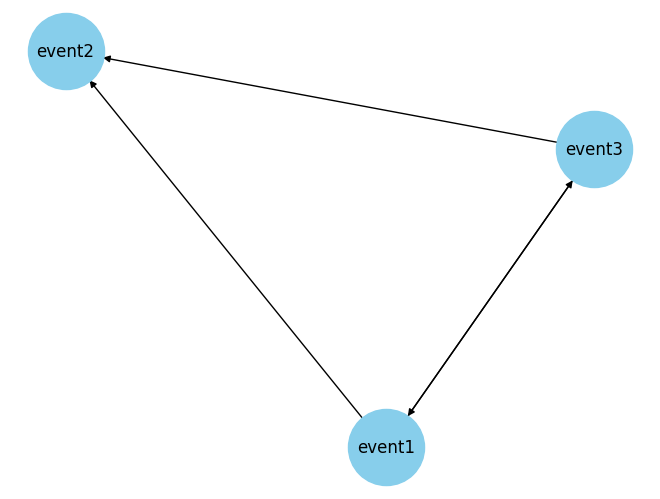

In [390]:
# Plot Graph
graph = nx.read_graphml(io.StringIO(data.loc[presentation_row, 'graph']))
nx.draw(graph, with_labels=True, node_size=3000, node_color='skyblue')
plt.show()

In [391]:
# Answer
print(data.loc[presentation_row, 'answer'])

True


# Prediction Presentation


In [392]:
path = get_evaluation_file_path(event_n=3, formula_n=3, count=2000, model="gpt-3.5-turbo")
data = pd.read_csv(path)

In [393]:
data.head()

,context,query,question,code,formula,answer,graph,prediction,prediction_raw
0,"Initially, event3 happened. After event1, even...",C1: Event1 happens or event2 happens.\nC2: C1 ...,"=== Context ===\n\nInitially, event3 happened....","MODULE main\nVAR\n state : {event1, event2,...",(X ((event1 | event2) & event1)),True,"<graphml xmlns=""http://graphml.graphdrawing.or...",0.0,False
1,"Initially, event1 happened. After event3, no o...",C1: Event2 will happen eventually.\nC2: That e...,"=== Context ===\n\nInitially, event1 happened....","MODULE main\nVAR\n state : {event1, event2,...",(G (event2 -> (F event2))),True,"<graphml xmlns=""http://graphml.graphdrawing.or...",1.0,True
2,"Initially, event2 happened. After event2, even...",C1: Event3 will happen at next time.\nC2: Even...,"=== Context ===\n\nInitially, event2 happened....","MODULE main\nVAR\n state : {event1, event2,...",((X event3) -> (X event3)),True,"<graphml xmlns=""http://graphml.graphdrawing.or...",1.0,True
3,"Initially, event3 happened. After event1, even...",C1: Event2 happens and event3 happens.\nC2: Ev...,"=== Context ===\n\nInitially, event3 happened....","MODULE main\nVAR\n state : {event1, event2,...",(! (event1 | (event2 & event3))),True,"<graphml xmlns=""http://graphml.graphdrawing.or...",0.0,False
4,"Initially, event2 happened. After event1, even...",C1: Event3 happens or event3 happens.\nC2: C1 ...,"=== Context ===\n\nInitially, event2 happened....","MODULE main\nVAR\n state : {event1, event2,...",(! ((event3 | event3) | event1)),True,"<graphml xmlns=""http://graphml.graphdrawing.or...",0.0,False


In [394]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   context         2000 non-null   object 
 1   query           2000 non-null   object 
 2   question        2000 non-null   object 
 3   code            2000 non-null   object 
 4   formula         2000 non-null   object 
 5   answer          2000 non-null   bool   
 6   graph           2000 non-null   object 
 7   prediction      2000 non-null   float64
 8   prediction_raw  2000 non-null   object 
dtypes: bool(1), float64(1), object(7)
memory usage: 127.1+ KB


In [395]:
data['answer'] = data['answer'].apply(lambda x: 1 if x else 0)
data['prediction'] = data['prediction'].astype(int)

In [396]:
# Accuracy
print(f'{len(data[data['answer'] == data['prediction']]) * 100 / len(data)}%')

52.7%


In [397]:
# Prediction Distribution
data['prediction'].value_counts()

prediction
1    1302
0     698
Name: count, dtype: int64

In [398]:
# Precision, Recall, F1
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(data['answer'], data['prediction'], average='macro')
recall = recall_score(data['answer'], data['prediction'], average='macro')
f1 = f1_score(data['answer'], data['prediction'], average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Precision: 0.5297096378065045
Recall: 0.527
F1: 0.5159634833846535


# LLMs Evaluation

In [399]:
pd.DataFrame(metrics(data))

,raw,formatted
accuracy,0.527000,0.53
precision,0.529710,0.53
recall,0.527000,0.53
f1,0.515963,0.52


## 1. Event 3, Formula 3, Count 2000

In [400]:
models = ["gpt-3.5-turbo", "llama3:70b-instruct", "qwen:72b-chat", "gemma:7b-instruct", "qwen:7b-chat",
          "mistral:7b-instruct"]

In [401]:
models_metrics = {}
for model in models:
    path = get_evaluation_file_path(event_n=3, formula_n=3, count=2000, model=model)
    if not os.path.exists(path):
        warnings.warn(f"Evaluation file of model {model} does not exist.", UserWarning)
        continue
    data = pd.read_csv(path)
    data['answer'] = data['answer'].apply(lambda x: 1 if x else 0)
    data['prediction'] = data['prediction'].astype(int)
    models_metrics[model] = metrics(data)['raw']

df = pd.DataFrame(models_metrics)
df.transpose()

,accuracy,precision,recall,f1
gpt-3.5-turbo,0.5270,0.529710,0.5270,0.515963
llama3:70b-instruct,0.5795,0.588013,0.5795,0.569080
qwen:72b-chat,0.5865,0.393391,0.3910,0.388504
gemma:7b-instruct,0.5345,0.552080,0.5345,0.491596
qwen:7b-chat,0.5300,0.530003,0.5300,0.529988
mistral:7b-instruct,0.5370,0.549466,0.5370,0.505869


## 2. Event 2, Formula 1-9, Count 300

In [402]:
event_n = 2
count = 300
formulas = [1, 2, 3, 4, 5, 7, 9]

models_data_df = pd.DataFrame()
for model in models:
    data = {}
    for formula_n in formulas:
        path = get_evaluation_file_path(event_n=event_n, formula_n=formula_n, count=count, model=model)
        if not os.path.exists(path):
            warnings.warn(f"Evaluation file of model {model} does not exist.", UserWarning)
            continue
        df = pd.read_csv(path)
        df['answer'] = df['answer'].apply(lambda x: 1 if x else 0)
        df['prediction'] = df['prediction'].astype(int)
        data[formula_n] = metrics(df)['raw']
    df = pd.DataFrame(data).transpose().reset_index().rename(columns={'index': 'formula_length'})
    df['model'] = model
    models_data_df = pd.concat([models_data_df, df], ignore_index=True)

models_data_df

,formula_length,accuracy,precision,recall,f1,model
0,1,0.606667,0.621237,0.606667,0.594483,gpt-3.5-turbo
1,2,0.580000,0.590927,0.580000,0.566990,gpt-3.5-turbo
2,3,0.570000,0.578362,0.570000,0.558214,gpt-3.5-turbo
3,4,0.623333,0.639454,0.623333,0.612124,gpt-3.5-turbo
4,5,0.556667,0.560775,0.556667,0.549046,gpt-3.5-turbo
5,7,0.603333,0.608589,0.603333,0.598475,gpt-3.5-turbo
6,9,0.543333,0.546141,0.543333,0.536280,gpt-3.5-turbo
7,1,0.686667,0.477138,0.457778,0.453962,llama3:70b-instruct
8,2,0.613333,0.625098,0.613333,0.604023,llama3:70b-instruct
9,3,0.596667,0.603675,0.596667,0.589733,llama3:70b-instruct


### 2.1. Accuracy

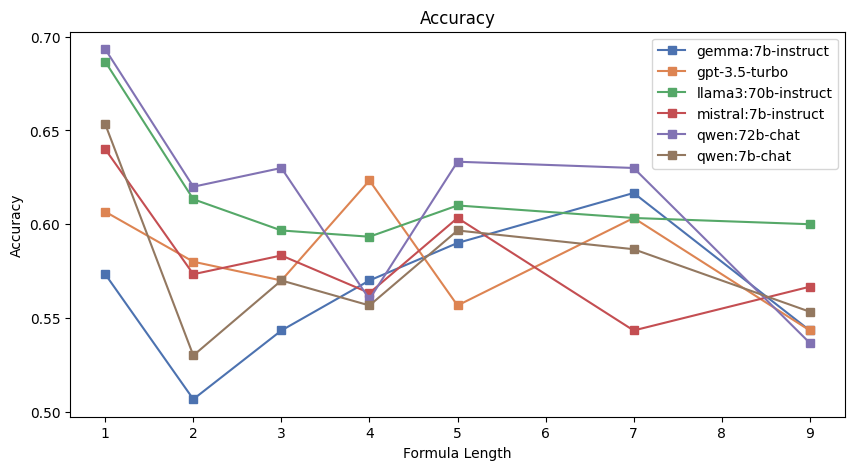

In [403]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.5, 0.75, 0.05))
plot_lines(models_data_df, x='formula_length', y='accuracy', z='model', title='Accuracy', x_label='Formula Length',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)

### 2.2. Precision

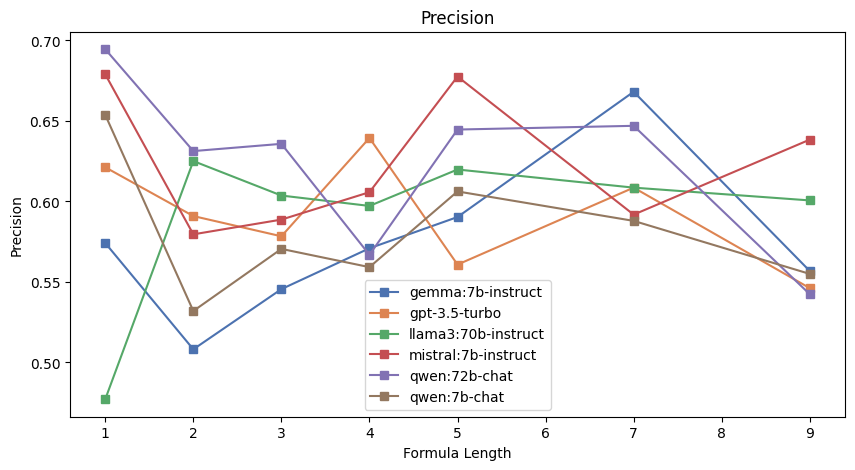

In [404]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.5, 0.75, 0.05))
plot_lines(models_data_df, x='formula_length', y='precision', z='model', title='Precision', x_label='Formula Length',
           y_label='Precision', x_ticks=x_ticks, y_ticks=y_ticks)

### 2.3. Recall

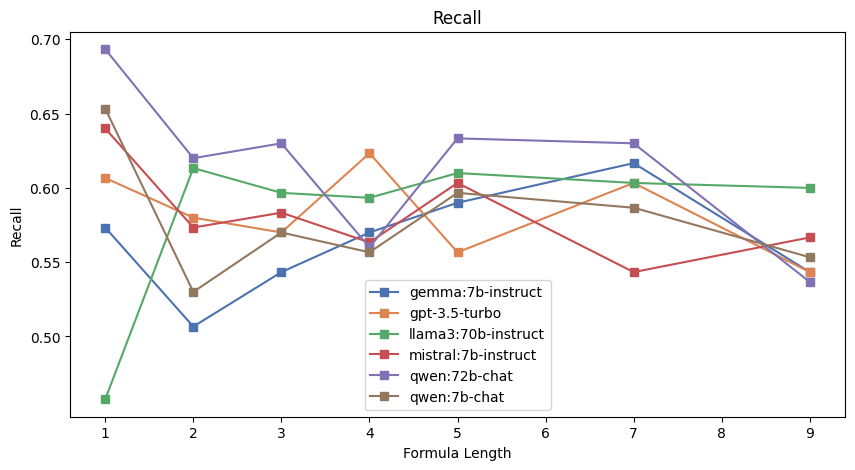

In [405]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.5, 0.75, 0.05))
plot_lines(models_data_df, x='formula_length', y='recall', z='model', title='Recall', x_label='Formula Length',
           y_label='Recall', x_ticks=x_ticks, y_ticks=y_ticks)

### 2.4. F1

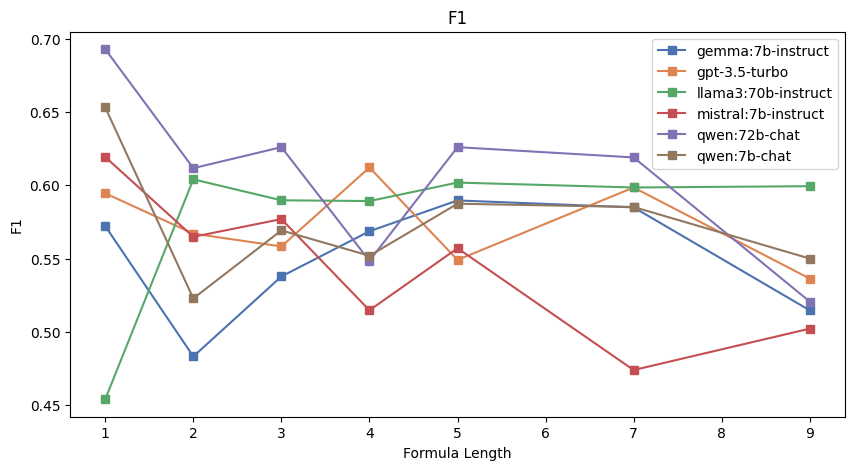

In [406]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.45, 0.75, 0.05))
plot_lines(models_data_df, x='formula_length', y='f1', z='model', title='F1', x_label='Formula Length', y_label='F1',
           x_ticks=x_ticks, y_ticks=y_ticks)

## 3. Formula 2, Event 2-9, Count 300

In [407]:
count = 300
formulas = 2
events_n = [2, 3, 4, 5, 7, 9]

models_data_df = pd.DataFrame()
for model in models:
    data = {}
    for e_n in events_n:
        path = get_evaluation_file_path(event_n=e_n, formula_n=formulas, count=count, model=model)
        if not os.path.exists(path):
            warnings.warn(f"Evaluation file of model {model} does not exist.", UserWarning)
            continue
        df = pd.read_csv(path)
        df['answer'] = df['answer'].apply(lambda x: 1 if x else 0)
        df['prediction'] = df['prediction'].astype(int)
        data[e_n] = metrics(df)['raw']
    df = pd.DataFrame(data).transpose().reset_index().rename(columns={'index': 'event_n'})
    df['model'] = model
    models_data_df = pd.concat([models_data_df, df], ignore_index=True)

models_data_df

,event_n,accuracy,precision,recall,f1,model
0,2,0.580000,0.590927,0.580000,0.566990,gpt-3.5-turbo
1,3,0.550000,0.554037,0.550000,0.541435,gpt-3.5-turbo
2,4,0.533333,0.535371,0.533333,0.526515,gpt-3.5-turbo
3,5,0.526667,0.528708,0.526667,0.518100,gpt-3.5-turbo
4,7,0.510000,0.510200,0.510000,0.507587,gpt-3.5-turbo
5,9,0.503333,0.503429,0.503333,0.499860,gpt-3.5-turbo
6,2,0.613333,0.625098,0.613333,0.604023,llama3:70b-instruct
7,3,0.570000,0.573560,0.570000,0.564733,llama3:70b-instruct
8,4,0.583333,0.590795,0.583333,0.574594,llama3:70b-instruct
9,5,0.516667,0.517626,0.516667,0.509997,llama3:70b-instruct


### 3.1. Accuracy

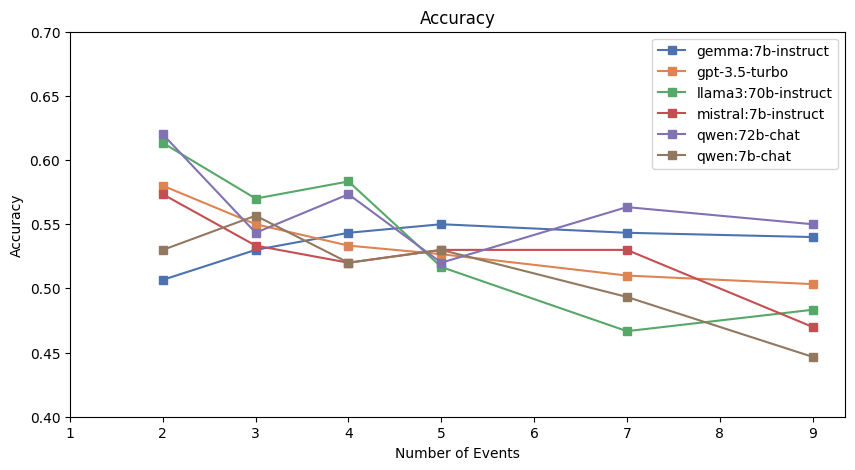

In [408]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.4, 0.75, 0.05))
plot_lines(models_data_df, x='event_n', y='accuracy', z='model', title='Accuracy', x_label='Number of Events',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)

### 3.2. Precision

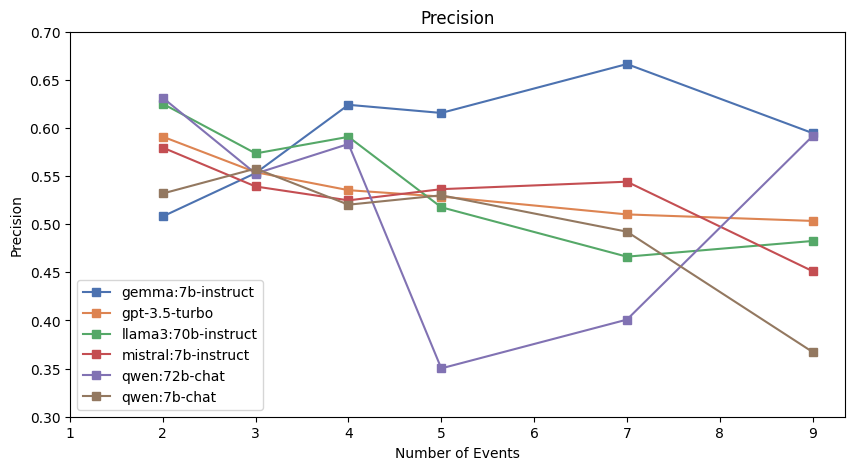

In [409]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.3, 0.75, 0.05))
plot_lines(models_data_df, x='event_n', y='precision', z='model', title='Precision', x_label='Number of Events',
           y_label='Precision', x_ticks=x_ticks, y_ticks=y_ticks)

### 3.3. Recall

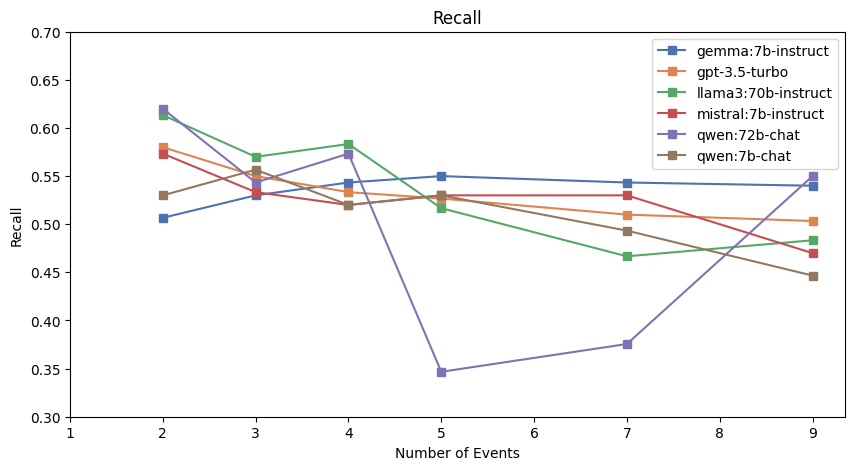

In [410]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.3, 0.75, 0.05))
plot_lines(models_data_df, x='event_n', y='recall', z='model', title='Recall', x_label='Number of Events',
           y_label='Recall', x_ticks=x_ticks, y_ticks=y_ticks)

### 3.4. F1

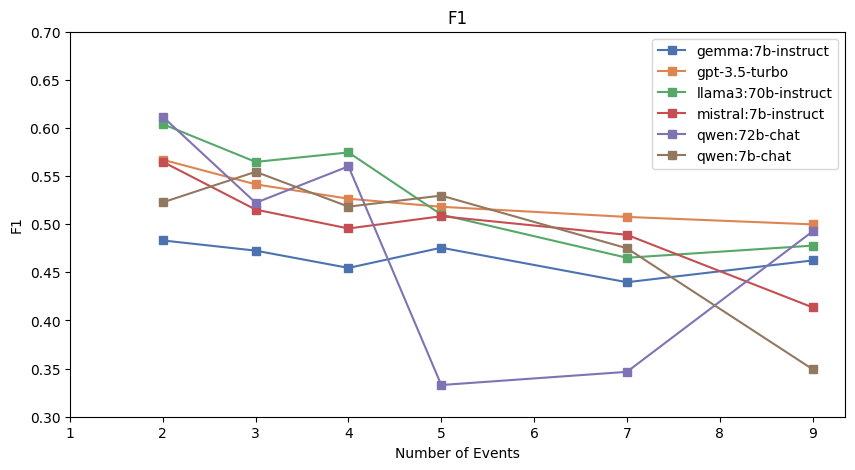

In [411]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.3, 0.75, 0.05))
plot_lines(models_data_df, x='event_n', y='f1', z='model', title='F1', x_label='Number of Events', y_label='F1',
           x_ticks=x_ticks, y_ticks=y_ticks)